<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/workshops/workshop7/conv_vs_fully_connected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

In [58]:
tf.random.set_seed(1)

In [59]:
print(tf.__version__)

2.4.1


In [60]:
class Encoder(layers.Layer):
  def __init__(self, units):  
    super(Encoder, self).__init__()
    self.layers = [layers.Dense(units=u, activation=tf.nn.relu) for u in units]
  def call(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [61]:
class Decoder(layers.Layer):
  def __init__(self, units):
    super(Decoder, self).__init__(units)
    self.layers = [layers.Dense(units=u, activation=tf.nn.relu) for u in units]
  def call(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [62]:
class Autoencoder(tf.keras.Model):
  def __init__(self, encoder_units, decoder_units):
    super(Autoencoder, self).__init__()
    self.encoder = Encoder(encoder_units)
    self.decoder = Decoder(decoder_units)
  def call(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x
  def model(self,input_shape):
    x = layers.Input(shape=input_shape)
    return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [63]:
(X_train, Y_train), (X_test, Y_test) =  tf.keras.datasets.mnist.load_data()
X_train = X_train/ 255
X_test = X_test/ 255
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2])).astype(np.float32)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2])).astype(np.float32)

In [64]:
autoencoder = Autoencoder([X_train.shape[1], 200], [X_train.shape[1]])

In [65]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [66]:
autoencoder.build(X_train.shape)
autoencoder.model(input_shape=X_train.shape[1]).summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
encoder_2 (Encoder)          (None, 200)               772440    
_________________________________________________________________
decoder_2 (Decoder)          (None, 784)               157584    
Total params: 930,024
Trainable params: 930,024
Non-trainable params: 0
_________________________________________________________________


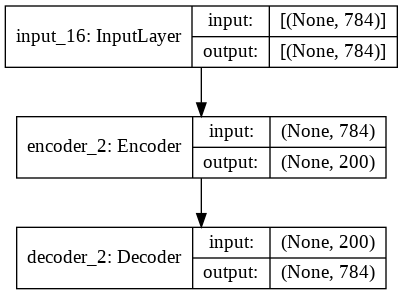

In [67]:
plot_model(autoencoder.model(input_shape=X_train.shape[1]),show_shapes=True, show_layer_names=True)

In [68]:
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 8s 32ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 2/50
235/235 [==============================] - 7s 31ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3/50
235/235 [==============================] - 7s 30ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4/50
235/235 [==============================] - 7s 30ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 5/50
235/235 [==============================] - 7s 31ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 6/50
235/235 [==============================] - 7s 31ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 7/50
235/235 [==============================] - 7s 30ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 8/50
235/235 [==============================] - 7s 30ms/step - 

# CNN AutoEncoder 

In [69]:
class AutoencoderCNN(tf.keras.Model):
  def __init__(self):
    super(AutoencoderCNN, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(4, (3, 3), activation='relu', padding='same', strides=2)])
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])
  def call(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x
  def model(self,input_shape):
    x = layers.Input(shape=input_shape)
    return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [70]:
(X_train, Y_train), (X_test, Y_test) =  tf.keras.datasets.mnist.load_data()
X_train = X_train/ 255
X_test = X_test/ 255
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [71]:
autoencoder = AutoencoderCNN()

In [72]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [73]:
autoencoder.build(X_train.shape)
autoencoder.model(input_shape=X_train.shape[1:3]).summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
sequential_8 (Sequential)    (None, 7, 7, 4)           372       
_________________________________________________________________
sequential_9 (Sequential)    (None, 28, 28, 1)         517       
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


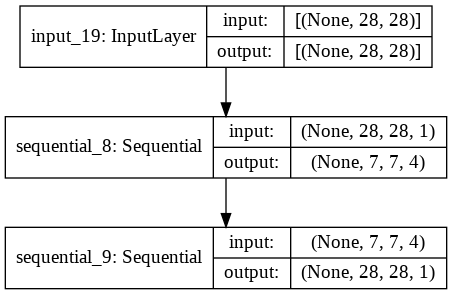

In [74]:
plot_model(autoencoder.model(input_shape=X_train.shape[1:3]),show_shapes=True, show_layer_names=True)

In [75]:
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 35s 145ms/step - loss: 0.1555 - mse: 0.1555 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 2/50
235/235 [==============================] - 34s 143ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 3/50
235/235 [==============================] - 33s 142ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 4/50
235/235 [==============================] - 34s 144ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5/50
235/235 [==============================] - 34s 143ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 6/50
235/235 [==============================] - 34s 143ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 7/50
235/235 [==============================] - 34s 143ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/50
235/235 [==============================] - 3